In [1]:
#필요한 모듈 라이브러리를 불러온다.
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.font_manager as fm
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

#경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

#코드 숨기기
from IPython.display import HTML

#모델링
import statsmodels.formula.api as smf
import statsmodels.api as sm


Bad key text.latex.preview in file /Users/kwak-yejin/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/kwak-yejin/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/kwak-yejin/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, lin

# 데이터 전처리

In [2]:
result1 = pd.read_csv("data/result1_imputed.csv", sep=",")
result2 = pd.read_csv("data/result2_imputed.csv", sep=",")
result3 = pd.read_csv("data/result3_imputed.csv", sep=",")

In [3]:
result1.head()

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id,exercise_prescription
0,19.3,43.2,49.0,-10.0,36.0,88.0,11.1,149.8,1,2019.0,1.0,6.0,47.4,89.0,133.0,0.991376,0,2884332,"본운동:한발 연속 뛰기,뒤꿈치 높이들어 뛰기,무릎 높이 들어 뛰기,점프하며 뛰기,메..."
1,18.5,48.7,47.0,-3.0,21.5,100.0,6.0,162.4,1,2019.0,1.0,13.0,47.4,91.0,139.0,0.992535,1,2884333,"준비운동:정적 스트레칭 루틴프로그램,동적 스트레칭 루틴프로그램,몸통 들어올리기,팔..."
2,22.5,66.3,26.0,-0.2,20.4,77.0,22.4,171.6,1,2019.0,1.0,15.0,46.2,112.0,122.0,0.898405,2,2884334,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:합장하여 앞으로 숙이기,허리숙여 양팔..."
3,18.9,52.5,38.0,16.7,14.5,89.0,10.3,166.8,1,2019.0,1.0,10.0,48.9,92.0,134.0,0.967028,3,2884335,"준비운동:전신 루틴 스트레칭,한발 앞으로 내밀고 앉았다 일어서기,서서 상체 일으키기..."
4,22.6,59.2,36.0,-15.0,28.7,79.0,12.9,161.8,1,2019.0,1.0,7.0,51.4,66.0,127.0,0.994139,4,2884336,본운동:동적 스트레칭 루틴프로그램


In [4]:
result1.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8279 entries, 0 to 8278
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BMI                    8279 non-null   float64
 1   Weight                 8279 non-null   float64
 2   age                    8279 non-null   float64
 3   bending_forward        8279 non-null   float64
 4   body_fat               8279 non-null   float64
 5   diastolic_bp           8279 non-null   float64
 6   grip_power             8279 non-null   float64
 7   height                 8279 non-null   float64
 8   label                  8279 non-null   int64  
 9   measure_time           8279 non-null   float64
 10  sex                    8279 non-null   float64
 11  sit_up                 8279 non-null   float64
 12  step_inspection        8279 non-null   float64
 13  step_recover_time      8279 non-null   float64
 14  systolic_bp            8279 non-null   float64
 15  scor

In [5]:
result1[result1["exercise_prescription"].isnull()].index

Int64Index([   9,   10,   23,   25,   29,   34,   38,   42,   48,   55,
            ...
            8200, 8227, 8239, 8243, 8256, 8261, 8262, 8267, 8271, 8278],
           dtype='int64', length=1164)

In [6]:
7115+1164

8279

In [7]:
result1 = result1.drop(result1[result1["exercise_prescription"].isnull()].index, axis=0)
result1 = result1.reset_index(drop=True)
result1

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id,exercise_prescription
0,19.3,43.2,49.0,-10.0,36.0,88.0,11.1,149.8,1,2019.0,1.0,6.0,47.4,89.0,133.0,0.991376,0,2884332,"본운동:한발 연속 뛰기,뒤꿈치 높이들어 뛰기,무릎 높이 들어 뛰기,점프하며 뛰기,메..."
1,18.5,48.7,47.0,-3.0,21.5,100.0,6.0,162.4,1,2019.0,1.0,13.0,47.4,91.0,139.0,0.992535,1,2884333,"준비운동:정적 스트레칭 루틴프로그램,동적 스트레칭 루틴프로그램,몸통 들어올리기,팔..."
2,22.5,66.3,26.0,-0.2,20.4,77.0,22.4,171.6,1,2019.0,1.0,15.0,46.2,112.0,122.0,0.898405,2,2884334,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:합장하여 앞으로 숙이기,허리숙여 양팔..."
3,18.9,52.5,38.0,16.7,14.5,89.0,10.3,166.8,1,2019.0,1.0,10.0,48.9,92.0,134.0,0.967028,3,2884335,"준비운동:전신 루틴 스트레칭,한발 앞으로 내밀고 앉았다 일어서기,서서 상체 일으키기..."
4,22.6,59.2,36.0,-15.0,28.7,79.0,12.9,161.8,1,2019.0,1.0,7.0,51.4,66.0,127.0,0.994139,4,2884336,본운동:동적 스트레칭 루틴프로그램
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110,28.9,80.6,28.0,-20.0,36.5,71.0,16.4,167.0,1,2021.0,1.0,2.0,39.8,125.0,116.0,0.997637,8273,2892605,준비운동:달리기
7111,18.5,50.8,41.0,-20.0,31.4,99.0,9.5,165.6,1,2021.0,1.0,1.0,42.3,130.0,152.0,0.998316,8274,2892606,"준비운동:줄넘기 운동,앉았다 일어서기,엉덩이 늘리기,짐볼 운동 루틴프로그램"
7112,21.7,47.2,38.0,-20.0,33.2,54.0,11.3,147.6,1,2021.0,1.0,2.0,42.0,123.0,105.0,0.994886,8275,2892607,"준비운동:하지 루틴 스트레칭1,하지 루틴 스트레칭2,전신 루틴 스트레칭,유산소 운동..."
7113,34.8,71.2,41.0,-20.0,49.4,83.0,11.3,143.0,1,2021.0,1.0,2.0,35.0,116.0,126.0,0.999538,8276,2892608,"준비운동:무릎굽혀 원 그리기,네발 걷기,다리 들어올리기,고양이 자세,옆구리 스트레칭..."


In [8]:
result1.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BMI                    7115 non-null   float64
 1   Weight                 7115 non-null   float64
 2   age                    7115 non-null   float64
 3   bending_forward        7115 non-null   float64
 4   body_fat               7115 non-null   float64
 5   diastolic_bp           7115 non-null   float64
 6   grip_power             7115 non-null   float64
 7   height                 7115 non-null   float64
 8   label                  7115 non-null   int64  
 9   measure_time           7115 non-null   float64
 10  sex                    7115 non-null   float64
 11  sit_up                 7115 non-null   float64
 12  step_inspection        7115 non-null   float64
 13  step_recover_time      7115 non-null   float64
 14  systolic_bp            7115 non-null   float64
 15  scor

In [9]:
for i in range(len(result1)):
    result1['exercise_prescription'][i] = result1['exercise_prescription'][i].replace(" " , "").replace("준비운동" , "준비운동").replace("/본운동" , "|본운동").replace("/마무리운동" , "|마무리운동")
    result1['exercise_prescription'][i] = result1['exercise_prescription'][i].replace("/" , "").replace("|" , "/")

In [10]:
num = list()
for i in range (len(result1)):
    num.append(len(result1['exercise_prescription'][i].replace(" " , "").split('/')))

In [11]:
set(num)

{1, 2, 3}

In [12]:
len(num)

7115

In [13]:
prepare = list()
main = list()
end = list()
for i in range (len(result1)):
    if len(result1['exercise_prescription'][i].replace(" " , "").split('/')) == 1:
        if result1['exercise_prescription'][i].replace(" " , "").split('/')[0][:4] == '준비운동':
            prepare.append(result1['exercise_prescription'][i].replace(" " , "").split('/')[0][5:].split(','))
            main.append([])
            end.append([])
        elif result1['exercise_prescription'][i].replace(" " , "").split('/')[0][:3] == '본운동':
            main.append(result1['exercise_prescription'][i].replace(" " , "").split('/')[0][4:].split(','))
            prepare.append([])
            end.append([])
        else:
            end.append(result1['exercise_prescription'][i].replace(" " , "").split('/')[0][6:].split(','))
            prepare.append([])
            main.append([])

            
    if len(result1['exercise_prescription'][i].replace(" " , "").split('/')) == 2:
        if result1['exercise_prescription'][i].replace(" " , "").split('/')[0][:4] == '준비운동':
            prepare.append(result1['exercise_prescription'][i].replace(" " , "").split('/')[0][5:].split(','))
            if result1['exercise_prescription'][i].replace(" " , "").split('/')[1][:3] == '본운동':
                main.append(result1['exercise_prescription'][i].replace(" " , "").split('/')[0][4:].split(','))
                end.append([])
            else:
                end.append(result1['exercise_prescription'][i].replace(" " , "").split('/')[0][6:].split(','))
                main.append([])
                
        else:
            main.append(result1['exercise_prescription'][i].replace(" " , "").split('/')[0][4:].split(','))
            end.append(result1['exercise_prescription'][i].replace(" " , "").split('/')[1][6:].split(','))
            prepare.append([])
            
    if len(result1['exercise_prescription'][i].replace(" " , "").split('/')) == 3:
        prepare.append(result1['exercise_prescription'][i].replace(" " , "").split('/')[0][5:].split(','))
        main.append(result1['exercise_prescription'][i].replace(" " , "").split('/')[1][4:].split(','))       
        end.append(result1['exercise_prescription'][i].replace(" " , "").split('/')[2][6:].split(','))

In [14]:
prepare

[[],
 ['정적스트레칭루틴프로그램',
  '동적스트레칭루틴프로그램',
  '몸통들어올리기',
  '팔굽혀펴기',
  '팔다리교차버티기',
  '윗몸일으키기',
  '앉았다일어서기',
  '버피테스트',
  '걷기',
  '조깅',
  '자전거타기'],
 ['동적스트레칭루틴프로그램'],
 ['전신루틴스트레칭', '한발앞으로내밀고앉았다일어서기', '서서상체일으키기', '엎드려버티기', '누워서엉덩이들어올리기', '팔굽혀펴기'],
 [],
 ['정적스트레칭루틴프로그램'],
 ['한발앞굽이팔위로뻗어가슴내밀기',
  '다리꼬아상체앞으로숙이기',
  '다리벌려옆으로상체숙이기',
  '다리모아상체숙이기',
  '다리벌려앞으로상체숙이기'],
 ['동적스트레칭루틴프로그램'],
 ['앉아서밴드잡고몸통돌리기', '밴드잡고몸통옆으로굽히기', '바벨들어올리기'],
 ['하지루틴스트레칭1', '상지루틴스트레칭'],
 ['다리벌려옆으로상체숙이기',
  '다리벌려앞으로상체숙이기',
  '발목얹고다리잡아당기기',
  '다리모아상체숙이기',
  '한발뒤로빼고앞으로굽히기',
  '앉아서옆구리늘려주기'],
 ['발목얹고다리잡아당기기', '누워서굽힌다리펴기', '무릎굽혀가슴닿기', '한발뒤로빼고앞으로굽히기'],
 ['관절염을위한스트레칭'],
 ['허리스트레칭', '조깅', '앉았다일어서기'],
 ['동적스트레칭루틴프로그램', '다리벌려옆으로상체숙이기', '다리벌려앞으로상체숙이기', '누워서굽힌다리펴기'],
 ['깍지끼고상체숙이기', '목스트레칭', '회전근개스트레칭', '어깨스트레칭', '넙다리앞쪽스트레칭', '대퇴사두근스트레칭'],
 [],
 [],
 ['왕복달리기', '제자리뛰기', '박스옆으로번갈아뛰기'],
 [],
 ['발목얹고다리잡아당기기', '누워서굽힌다리펴기', '무릎굽혀가슴닿기', '한발뒤로빼고앞으로굽히기'],
 ['동적스트레칭루틴프로그램'],
 [],
 ['무릎굽혀가슴닿기',
  '발바닥마주대고끌어당기기',
  '발목얹고다리잡아당기기',
  '다리벌려앞으로상체숙이기',
  '다

In [15]:
len(prepare)

7115

In [16]:
for i in main:
    if i:
        if i[0][:1]==':':
            i[0] = i[0][1:]

In [17]:
len(main)

7115

In [18]:
for i in end:
    if i:
        if i[0][:1]==':':
            i[0] = i[0][1:]

In [19]:
len(end)

7115

In [20]:
exercise_prepare = set()
for j in range(len(prepare)):
    for i in prepare[j]:
        exercise_prepare.add(i)
len(exercise_prepare)
exercise_prepare = list(exercise_prepare)
exercise_prepare = exercise_prepare[1:]
exercise_prepare

['다리옆으로들어올리기',
 '스텝퍼올라가서점프하여착지하기',
 '어깨올리기',
 '누워무릎교차올리기',
 '옆으로팔대고버티기',
 '아래팔스트레칭',
 '배스트레칭',
 '앉아서엉덩이들고이동하기',
 '전갈자세',
 '활자세',
 '자전거타기',
 '좌우찍기',
 '전진점프하며발뒤꿈치찍기',
 '의자이용유연성운동루틴프로그램',
 '반달자세',
 '의자앉아다리로짐볼쥐기',
 '앞굽이앉았다일어서기',
 '덤벨잡고앉았다일어서기',
 '앉아서밴드잡고몸통돌리기',
 '덤벨잡고뒤꿈치들기',
 '의자에앉아옆구리숙이기',
 '한발들어올리기',
 '스텝퍼뛰어서오르내리기',
 '한발앞으로내밀고앉았다일어서기',
 '양발교차올리기',
 '한발앞굽이팔위로뻗어가슴내밀기',
 '의자잡고후방으로한발뻗어들기',
 '공양손으로주고받기',
 '앉아서다리펴기',
 '자세낮춰이동하기',
 '아쿠아로빅',
 '밴드잡고몸통옆으로굽히기',
 '옆구리스트레칭',
 '물통으로양팔들어올리기',
 '슈퍼맨자세',
 '머리뒤로깍지끼고상체숙이기',
 '실외자전거타기',
 '팔굽혀펴기후점프하기',
 '짐볼에서엉덩이돌리기',
 '팔벌려뛰기',
 '계단뛰어오르기',
 '앉아서위로밀기',
 '스텝박스오르내리기',
 '웅크리고앉아손잡고상체숙이기',
 '점프하며앞으로나가기',
 '서서다리로탄력밴드당겨중심잡기루틴운동',
 '계단올라갔다내려오기',
 '사다리안팎뛰기',
 '다리모아뒤로눕기',
 '몸통옆으로굽히기',
 '의자앞에서앉았다일어서기',
 '엎드려팔로걷기',
 '트레드밀에서걷기',
 '앉아서다리굽히기',
 '저항밴드운동루틴프로그램',
 '몸통들어올리기',
 '허리감아볼돌리기',
 '발목돌리기',
 '의자에한다리올리고앉앗다일어서기',
 '무릎굽혀원그리기',
 '뒤꿈치높이들어뛰기',
 '무릎당겨올리기',
 '다리벌려옆으로상체숙이기',
 '스텝퍼옆으로뛰어넘기',
 '허리비틀어볼주고받기',
 '다리벌려앞으로상체숙이기',
 '네발기기자세로팔다리들기',
 '하지루틴스트레칭2',
 '목당기기',
 '50M달리기',
 '팔돌리며점프

In [21]:
exercise_main = set()
for j in range(len(main)):
    for i in main[j]:
        exercise_main.add(i)
len(exercise_main)
exercise_main = list(exercise_main)
exercise_main = exercise_main[1:]
exercise_main

['다리옆으로들어올리기',
 '스텝퍼올라가서점프하여착지하기',
 '누워무릎교차올리기',
 '어깨올리기',
 '앉아서밴드당기기',
 '훌라후프로공끌고가기',
 '옆으로팔대고버티기',
 '아래팔스트레칭',
 '배스트레칭',
 '앉아서엉덩이들고이동하기',
 '전갈자세',
 '활자세',
 '자전거타기',
 '짐볼앞으로밀기',
 '좌우찍기',
 '전진점프하며발뒤꿈치찍기',
 '의자앉아다리로짐볼쥐기',
 '반달자세',
 '의자이용유연성운동루틴프로그램',
 '짐볼에다리올리고엉덩이들어올리기',
 '앞굽이앉았다일어서기',
 '덤벨잡고앉았다일어서기',
 '앉아서밴드잡고몸통돌리기',
 '덤벨잡고뒤꿈치들기',
 '스카프저글링',
 '의자에앉아옆구리숙이기',
 '한발들어올리기',
 '스텝퍼뛰어서오르내리기',
 '한발앞으로내밀고앉았다일어서기',
 '양발교차올리기',
 '한발앞굽이팔위로뻗어가슴내밀기',
 '계단두칸씩뛰기',
 '의자잡고후방으로한발뻗어들기',
 '공양손으로주고받기',
 '사다리옆으로발옮기기',
 '앉아서다리펴기',
 '자세낮춰이동하기',
 '앉아서팔꿈치굽히기펴기',
 '아쿠아로빅',
 '밴드잡고몸통옆으로굽히기',
 '옆구리스트레칭',
 '빠르게무릎들어뛰기',
 '허리굽혀덤벨들기',
 '물통으로양팔들어올리기',
 '슈퍼맨자세',
 '머리뒤로깍지끼고상체숙이기',
 '실외자전거타기',
 '팔굽혀펴기후점프하기',
 '짐볼에서엉덩이돌리기',
 '팔벌려뛰기',
 '계단뛰어오르기',
 '앉아서위로밀기',
 '네발기기자세에서손바닥으로바닥밀기',
 '아쿠아로빅-발닿기',
 '스텝박스오르내리기',
 '웅크리고앉아손잡고상체숙이기',
 '점프하며앞으로나가기',
 '서서다리로탄력밴드당겨중심잡기루틴운동',
 '계단올라갔다내려오기',
 '무릎굽혀엉덩이들어올리기',
 '사다리안팎뛰기',
 '다리모아뒤로눕기',
 '아령뒤로들어올리기',
 '몸통옆으로굽히기',
 '의자앞에서앉았다일어서기',
 '엎드려팔로걷기',
 '발바닥치기',
 '트레드밀에서걷기',
 '저항밴드운동루틴프로그램',
 '앉아서다리굽히기',

In [22]:
exercise_end = set()
for j in range(len(end)):
    for i in end[j]:
        exercise_end.add(i)
len(exercise_end)
exercise_end = list(exercise_end)
exercise_end = exercise_end[1:]
exercise_end

['무릎대고옆으로기울이기',
 '작은공을이용한동적루틴스트레칭',
 '다리뻗어상체숙이기',
 '전진점프하며발바닥찍기',
 '무릎들어올리기',
 '전신루틴스트레칭',
 '제자리뛰기',
 '스텝퍼올라가서점프하여착지하기',
 '실내자전거타기',
 '골반스트레칭2',
 '아래팔스트레칭',
 '옆구리늘리기',
 '배스트레칭',
 '등스트레칭',
 '폼롤러앞으로굴리기',
 '전갈자세',
 '활자세',
 '동적스트레칭루틴프로그램',
 '자전거타기',
 '전진점프하며발뒤꿈치찍기',
 '의자이용유연성운동루틴프로그램',
 '마주앉아대퇴이두근스트레칭',
 '짐볼에다리올리고엉덩이들어올리기',
 '요통을위한스트레칭1',
 '양팔벌려전신비틀기',
 '팔당기기',
 '앞굽이앉았다일어서기',
 '네발걷기',
 '의자에앉아볼돌리기',
 '복부스트레칭',
 '무릎대고상체뒤로젖히기',
 '나비자세',
 '엉덩관절회전하기',
 '의자에앉아옆구리숙이기',
 '폼롤러이용유연성운동루틴프로그램',
 '자가근막이완술루틴스트레칭',
 '고정식자전거타기',
 '조깅',
 '어깨누르기',
 '대퇴이두근스트레칭',
 '회전근개스트레칭',
 '스텝퍼뛰어서오르내리기',
 '계단두발뛰기',
 '고양이자세',
 '한발앞굽이팔위로뻗어가슴내밀기',
 '목스트레칭',
 '종아리스트레칭',
 '수영',
 '발목얹고다리잡아당기기',
 '사다리옆으로발옮기기',
 '내전근스트레칭',
 '발등동시에늘리기',
 '앉아서다리펴기',
 '다리들어올리기',
 '아쿠아로빅',
 '옆구리스트레칭',
 '팔꿈치원그리기',
 '허리숙여양팔돌리기',
 '몸통비틀기',
 '측면팔대고버티기',
 '결가부좌',
 '비복근스트레칭',
 '스텝퍼뛰어서넘어가기',
 '깍지끼고상체숙이기',
 '다리굽혀허리비틀기',
 '엉덩이스트레칭',
 '요가및필라테스루틴프로그램',
 '누워서전신뻗기',
 '몸앞으로굽히기',
 '몸기울이기회전하기',
 '옆으로누워버티기',
 '팔벌려뛰기',
 '발닿기',
 '고정식트레드밀에서걷기',
 '유산소운동전동적루틴스트레칭',
 '사이드한

In [23]:
len(exercise_end)

221

In [24]:
p = [[0]*len(exercise_prepare) for i in range(len(result1))]
m = [[0]*len(exercise_main) for i in range(len(result1))]
e = [[0]*len(exercise_end) for i in range(len(result1))]

In [25]:
for j in range(len(exercise_prepare)):
    for i in range (len(result1)):
        if exercise_prepare[j] in prepare[i]:
            p[i][j]=1

In [26]:
for j in range(len(exercise_main)):
    for i in range (len(result1)):
        if exercise_main[j] in main[i]:
            m[i][j]=1

In [27]:
for j in range(len(exercise_end)):
    for i in range (len(result1)):
        if exercise_end[j] in end[i]:
            e[i][j]=1

In [28]:
p = pd.DataFrame(p)
m = pd.DataFrame(m)
e = pd.DataFrame(e)

In [29]:
p.columns = exercise_prepare
m.columns = exercise_main
e.columns = exercise_end

In [30]:
exercise_prepare

['다리옆으로들어올리기',
 '스텝퍼올라가서점프하여착지하기',
 '어깨올리기',
 '누워무릎교차올리기',
 '옆으로팔대고버티기',
 '아래팔스트레칭',
 '배스트레칭',
 '앉아서엉덩이들고이동하기',
 '전갈자세',
 '활자세',
 '자전거타기',
 '좌우찍기',
 '전진점프하며발뒤꿈치찍기',
 '의자이용유연성운동루틴프로그램',
 '반달자세',
 '의자앉아다리로짐볼쥐기',
 '앞굽이앉았다일어서기',
 '덤벨잡고앉았다일어서기',
 '앉아서밴드잡고몸통돌리기',
 '덤벨잡고뒤꿈치들기',
 '의자에앉아옆구리숙이기',
 '한발들어올리기',
 '스텝퍼뛰어서오르내리기',
 '한발앞으로내밀고앉았다일어서기',
 '양발교차올리기',
 '한발앞굽이팔위로뻗어가슴내밀기',
 '의자잡고후방으로한발뻗어들기',
 '공양손으로주고받기',
 '앉아서다리펴기',
 '자세낮춰이동하기',
 '아쿠아로빅',
 '밴드잡고몸통옆으로굽히기',
 '옆구리스트레칭',
 '물통으로양팔들어올리기',
 '슈퍼맨자세',
 '머리뒤로깍지끼고상체숙이기',
 '실외자전거타기',
 '팔굽혀펴기후점프하기',
 '짐볼에서엉덩이돌리기',
 '팔벌려뛰기',
 '계단뛰어오르기',
 '앉아서위로밀기',
 '스텝박스오르내리기',
 '웅크리고앉아손잡고상체숙이기',
 '점프하며앞으로나가기',
 '서서다리로탄력밴드당겨중심잡기루틴운동',
 '계단올라갔다내려오기',
 '사다리안팎뛰기',
 '다리모아뒤로눕기',
 '몸통옆으로굽히기',
 '의자앞에서앉았다일어서기',
 '엎드려팔로걷기',
 '트레드밀에서걷기',
 '앉아서다리굽히기',
 '저항밴드운동루틴프로그램',
 '몸통들어올리기',
 '허리감아볼돌리기',
 '발목돌리기',
 '의자에한다리올리고앉앗다일어서기',
 '무릎굽혀원그리기',
 '뒤꿈치높이들어뛰기',
 '무릎당겨올리기',
 '다리벌려옆으로상체숙이기',
 '스텝퍼옆으로뛰어넘기',
 '허리비틀어볼주고받기',
 '다리벌려앞으로상체숙이기',
 '네발기기자세로팔다리들기',
 '하지루틴스트레칭2',
 '목당기기',
 '50M달리기',
 '팔돌리며점프

In [31]:
drop_prepare = list()
for i in range(len(exercise_prepare)):
    if (len(p[exercise_prepare[i]][p[exercise_prepare[i]] == 1]) < 2):
        print(exercise_prepare[i],i)
        drop_prepare.append(exercise_prepare[i])

스텝퍼올라가서점프하여착지하기 1
어깨올리기 2
앉아서엉덩이들고이동하기 7
슈퍼맨자세 34
팔굽혀펴기후점프하기 37
밴드잡고무릎펴기 128
뛰어밀기 135
콘운동루틴프로그램 142
점프하며뛰기 150
누워서덤벨들어올리기 153
파워클린 168
앞차기하며뛰기 179
옆으로펀치하기 183
다리앞뒤로벌려굽혔다펴기 202
양팔크게벌리기 205
옆구리늘리기 224
앞발들어올리기 225
스텝퍼뛰어서넘어가기 252
덤벨잡고한발내밀어굽혔다펴기 256
사이드스텝 274
한발서서균형잡기 278
짐볼배에대고버티기 289
짐볼윗몸일으키기 303
한발로점프하기 304
아령앞으로들어올리기 357
마주보고종아리펴기 368
엎드려팔다리교차올리기 376
누워서공뒤로내리고당기기 387
밴드앞으로당기기 389
상체감아올리기 408
앉았다일어나며점프하기 410


In [32]:
drop_main = list()
for i in range(len(exercise_main)):
    if (len(m[exercise_main[i]][m[exercise_main[i]] == 1]) < 2):
        print(exercise_main[i],i)
        drop_main.append(exercise_main[i])

훌라후프로공끌고가기 5
50M달리기 88
짐볼앉기 125
아쿠아로빅-옆구리늘리기 137
뛰어밀기 179
짐볼양팔로밀기 284
한발앞뒤교차뛰기 310
물누르기올리기 351
목굽힘폄II 452
누워서뒤로팔굽혀펴기 520


In [33]:
drop_end = list()
for i in range(len(exercise_end)):
    if (len(e[exercise_end[i]][e[exercise_end[i]] == 1]) < 2):
        print(exercise_end[i],i)
        drop_end.append(exercise_end[i])

전진점프하며발뒤꿈치찍기 19
의자이용유연성운동루틴프로그램 20
짐볼에다리올리고엉덩이들어올리기 22
의자에앉아볼돌리기 28
엉덩관절회전하기 32
계단두발뛰기 42
짐볼들고양옆으로돌리기 76
레그스윙 101
아령뒤로들어올리기 104
엎드려한발원그리기 109
짐볼에다리올리고좌우로움직이기 127
스타투니풀 132
치매를위한스트레칭(의자) 141
골다공증을위한스트레칭 154
의자잡고팔뒤로굽히기 170
리굽혀덤벨뒤로들기 183
덤벨옆으로들어올리기 186
손목펴기굽히기 202


In [34]:
p = p.drop(drop_prepare,axis=1)
m = m.drop(drop_main,axis=1)
e = e.drop(drop_end,axis=1)

In [35]:
p

,다리옆으로들어올리기,누워무릎교차올리기,옆으로팔대고버티기,아래팔스트레칭,배스트레칭,전갈자세,활자세,자전거타기,좌우찍기,전진점프하며발뒤꿈치찍기,...,한발무릎위올려차기,연속무릎올리기,엎드려무릎당기기,겨드랑이늘리기,물병들고한발앞으로내밀고앉았다일어서기,앉았다일어서기,사다리이용루틴운동,옆으로누워다리들어올리기,앞뒤로선넘기,다리들어옆으로올리기
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
m

,다리옆으로들어올리기,스텝퍼올라가서점프하여착지하기,누워무릎교차올리기,어깨올리기,앉아서밴드당기기,옆으로팔대고버티기,아래팔스트레칭,배스트레칭,앉아서엉덩이들고이동하기,전갈자세,...,겨드랑이늘리기,허리굽혀팔뒤로들기,누워서팔밀기,엎드려서다리차올리기,물병들고한발앞으로내밀고앉았다일어서기,회전근개스트레칭2,앉았다일어서기,사다리이용루틴운동,옆으로누워다리들어올리기,앞뒤로선넘기
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
e

,무릎대고옆으로기울이기,작은공을이용한동적루틴스트레칭,다리뻗어상체숙이기,전진점프하며발바닥찍기,무릎들어올리기,전신루틴스트레칭,제자리뛰기,스텝퍼올라가서점프하여착지하기,실내자전거타기,골반스트레칭2,...,소머리자세,앉았다일어서기,의자이용하기,몸통스트레칭,어깨뒤쪽스트레칭,앞뒤로선넘기,발바닥마주대고끌어당기기,골반스트레칭,목돌림스트레칭,좌우로선넘기
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Random Forest

## 준비운동

In [38]:
train = result1[['BMI','Weight','age','bending_forward','body_fat','diastolic_bp','grip_power','height','measure_time','sex','sit_up','step_inspection','step_recover_time','systolic_bp']]
label = p

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model_list=[]
met=[]

In [42]:
for i in range(len(p.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[p.columns[i]], random_state=42, stratify=label[p.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = RandomForestClassifier()
    model.fit(train_features, train_labels)
    
    train_predict = model.predict(train_features) 
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    met.append([acc, precision, recall, f1, mcc,test_score])

    #test set 혼동행렬
    #print(confusion_matrix(test_labels, test_predict))
    #print("test_score: ",test_score, "\n")

    model_list.append(model)

In [43]:
mett = [[],[],[],[],[],[]]
for i in range(len(met)):
  mett[0].append(met[i][0])
  mett[1].append(met[i][1])
  mett[2].append(met[i][2])
  mett[3].append(met[i][3])
  mett[4].append(met[i][4])
  mett[5].append(met[i][5])

print('Average acc: ', np.mean(mett[0]))
print('Average precision: ', np.mean(mett[1])) 
print('Average recall: ', np.mean(mett[2]))  
print('Average f1: ', np.mean(mett[3]))
print('Average mcc: ', np.mean(mett[4])) 
print('Average test score: ', np.mean(mett[5]))

Average acc:  0.9971276141514599
Average precision:  0.904749725697195
Average recall:  0.6699502466133185
Average f1:  0.7501716013562654
Average mcc:  0.7668382769837762
Average test score:  0.9971276141514599


In [44]:
for i in range(len(p.columns)):
    if p.iloc[1][i] == 1:
        print(i,p.columns[i])

7 자전거타기
50 몸통들어올리기
111 버피테스트
112 조깅
130 윗몸일으키기
213 동적스트레칭루틴프로그램
215 팔굽혀펴기
245 팔다리교차버티기
263 걷기
358 정적스트레칭루틴프로그램
386 앉았다일어서기


In [45]:
Jack = np.array([19.3,43.2,49.0,-10.0,36.0,88.0,11.1,149.8,2019.0,1.0,6.0,47.400,89.00,133.0])
Rose = np.array([18.5,48.7,47.0,-3.0,21.5,100.0,6.0,162.4,2019.0,1.0,13.0,47.400,91.00,139.0])
ME = np.array([22.5,66.3,26.0,-0.2,20.4,77.0,22.4,171.6,2019.0,1.0,15.0,46.2,112.0,122.0])
ME2 = np.array([20.5,64.3,40.0,-1.0,35.4,100.0,5.4,170.4,2019.0,1.0,12.0,43.6,119.0,130.0])
human = np.array([Jack, Rose, ME,ME2])

In [46]:
#.reshape(1,-1)
human = scaler.transform(human)

In [47]:
for i in range(len(model_list)):
    if (model_list[i].predict(human[1].reshape(1, -1))==1):
        print(p.columns[i]+" 운동이 필요합니다")

자전거타기 운동이 필요합니다
조깅 운동이 필요합니다
동적스트레칭루틴프로그램 운동이 필요합니다
팔굽혀펴기 운동이 필요합니다
팔다리교차버티기 운동이 필요합니다
걷기 운동이 필요합니다
정적스트레칭루틴프로그램 운동이 필요합니다
앉았다일어서기 운동이 필요합니다


## 본운동

In [48]:
label=m
model_list2=[]
met2=[]

for i in range(len(m.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[m.columns[i]], random_state=42, stratify=label[m.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = RandomForestClassifier()
    model.fit(train_features, train_labels)
    
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    met2.append([acc,precision,recall,f1,mcc,test_score])

    #test set 혼동행렬
    #print(confusion_matrix(test_labels, test_predict))
    #print("test_score: ",test_score, "\n")

    model_list2.append(model)

In [49]:
mett2 = [[],[],[],[],[],[]]
for i in range(len(met2)):
    mett2[0].append(met2[i][0])
    mett2[1].append(met2[i][1])
    mett2[2].append(met2[i][2])
    mett2[3].append(met2[i][3])
    mett2[4].append(met2[i][4])
    mett2[5].append(met2[i][5])

print('Average acc: ', np.mean(mett2[0]))
print('Average precision: ', np.mean(mett2[1])) 
print('Average recall: ', np.mean(mett2[2]))  
print('Average f1: ', np.mean(mett2[3]))
print('Average mcc: ', np.mean(mett2[4])) 
print('Average test score: ', np.mean(mett2[5]))

Average acc:  0.9958107009986783
Average precision:  0.940347100934501
Average recall:  0.617767761376029
Average f1:  0.727915726812843
Average mcc:  0.7507101012795113
Average test score:  0.9958107009986783


## 마무리운동

In [50]:
label=e
model_list3=[]
met3=[[],[],[],[],[],[]]

for i in range(len(e.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[e.columns[i]], random_state=42, stratify=label[e.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = RandomForestClassifier()
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    met3[0].append(acc)
    met3[1].append(precision)
    met3[2].append(recall)
    met3[3].append(f1)
    met3[4].append(mcc)
    met3[5].append(test_score)

    model_list3.append(model)

In [51]:
print('Average acc: ', np.mean(met3[0]))
print('Average precision: ', np.mean(met3[1])) 
print('Average recall: ', np.mean(met3[2]))  
print('Average f1: ', np.mean(met3[3]))
print('Average mcc: ', np.mean(met3[4])) 
print('Average test score: ', np.mean(met3[5]))

Average acc:  0.9972365058135833
Average precision:  0.930641668082215
Average recall:  0.6936129522363973
Average f1:  0.7733723577496586
Average mcc:  0.7908290501812272
Average test score:  0.9972365058135833


## Random Forest의 test score

In [52]:
print(min(mett[5]), max(mett[5]), np.mean(mett[5]), np.median(mett[5]))
print(min(mett2[5]), max(mett2[5]), np.mean(mett2[5]), np.median(mett2[5]))
print(min(met3[5]), max(met3[5]), np.mean(met3[5]), np.median(met3[5]))

0.9398538504777965 1.0 0.9971276141514599 0.9994378864530635
0.9106239460370995 1.0 0.9958107009986783 0.9983136593591906
0.941540191118606 1.0 0.9972365058135833 0.9994378864530635


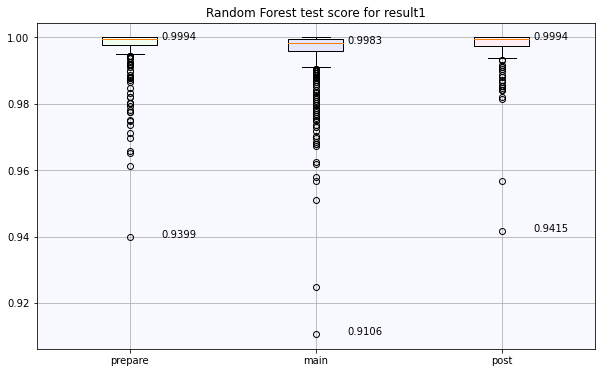

In [53]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([mett[5], mett2[5], met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.text(1.17,np.median(mett[5]),format(np.median(mett[5]),'.4f'))
plt.text(2.17,np.median(mett2[5]),format(np.median(mett2[5]),'.4f'))
plt.text(3.17,np.median(met3[5]),format(np.median(met3[5]),'.4f'))
plt.text(1.17,min(mett[5]),format(min(mett[5]),'.4f'))
plt.text(2.17,min(mett2[5]),format(min(mett2[5]),'.4f'))
plt.text(3.17,min(met3[5]),format(min(met3[5]),'.4f'))
# plt.text(1.17,np.mean(mett[5]),format(np.mean(mett[5]),'.4f'))
# plt.text(2.17,np.mean(mett2[5]),format(np.mean(mett2[5]),'.4f'))
# plt.text(3.17,np.mean(met3[5]),format(np.mean(met3[5]),'.4f'))


plt.title('Random Forest test score for result1')
plt.xticks([1,2,3],['prepare','main','post'])
plt.grid(True)
plt.show()

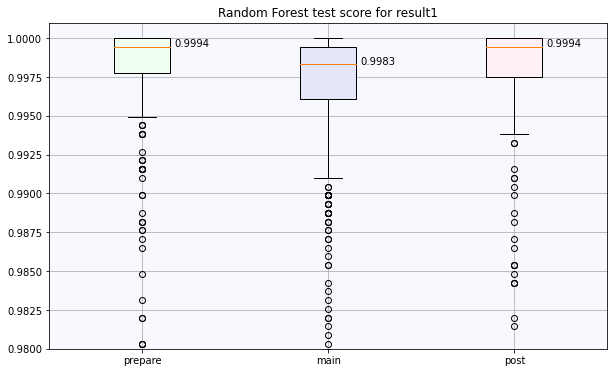

In [54]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([mett[5], mett2[5], met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Random Forest test score for result1')
plt.xticks([1,2,3],['prepare','main','post'])

plt.text(1.17,np.median(mett[5]),format(np.median(mett[5]),'.4f'))
plt.text(2.17,np.median(mett2[5]),format(np.median(mett2[5]),'.4f'))
plt.text(3.17,np.median(met3[5]),format(np.median(met3[5]),'.4f'))

ax.set_ylim(0.98,1.001)
plt.grid(True)
plt.show()

# XGBOOST

In [55]:
from xgboost import XGBClassifier

## 준비운동

In [56]:
train = result1[['BMI','Weight','age','bending_forward','body_fat','diastolic_bp','grip_power','height','measure_time','sex','sit_up','step_inspection','step_recover_time','systolic_bp']]
label = p
xgb_list=[]
xgb_met=[[],[],[],[],[],[]]

for i in range(len(p.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[p.columns[i]], stratify=label[p.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = XGBClassifier(random_state=222)
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    xgb_met[0].append(acc)
    xgb_met[1].append(precision)
    xgb_met[2].append(recall)
    xgb_met[3].append(f1)
    xgb_met[4].append(mcc)
    xgb_met[5].append(test_score)

    xgb_list.append(model)

In [57]:
print('Average acc: ', np.mean(xgb_met[0]))
print('Average precision: ', np.mean(xgb_met[1])) 
print('Average recall: ', np.mean(xgb_met[2]))  
print('Average f1: ', np.mean(xgb_met[3]))
print('Average mcc: ', np.mean(xgb_met[4])) 
print('Average test score: ', np.mean(xgb_met[5]))

Average acc:  0.996939284548778
Average precision:  0.703386090393816
Average recall:  0.4733808766318359
Average f1:  0.5517780343622323
Average mcc:  0.5680874622357996
Average test score:  0.996939284548778


## 본운동

In [58]:
train = result1[['BMI','Weight','age','bending_forward','body_fat','diastolic_bp','grip_power','height','measure_time','sex','sit_up','step_inspection','step_recover_time','systolic_bp']]
label = m
xgb_list2=[]
xgb_met2=[[],[],[],[],[],[]]

for i in range(len(m.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[m.columns[i]], random_state=42, stratify=label[m.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = XGBClassifier(random_state=222)
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    xgb_met2[0].append(acc)
    xgb_met2[1].append(precision)
    xgb_met2[2].append(recall)
    xgb_met2[3].append(f1)
    xgb_met2[4].append(mcc)
    xgb_met2[5].append(test_score)

    xgb_list2.append(model)

In [59]:
print('Average acc: ', np.mean(xgb_met2[0]))
print('Average precision: ', np.mean(xgb_met2[1])) 
print('Average recall: ', np.mean(xgb_met2[2]))  
print('Average f1: ', np.mean(xgb_met2[3]))
print('Average mcc: ', np.mean(xgb_met2[4])) 
print('Average test score: ', np.mean(xgb_met2[5]))

Average acc:  0.9955942722533337
Average precision:  0.8307004144221962
Average recall:  0.5268686242132373
Average f1:  0.6314575922188411
Average mcc:  0.6523446159703447
Average test score:  0.9955942722533337


## 마무리운동

In [60]:
train = result1[['BMI','Weight','age','bending_forward','body_fat','diastolic_bp','grip_power','height','measure_time','sex','sit_up','step_inspection','step_recover_time','systolic_bp']]
label = e
xgb_list3=[]
xgb_met3=[[],[],[],[],[],[]]

for i in range(len(e.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[e.columns[i]], random_state=42, stratify=label[e.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = XGBClassifier(random_state=222)
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    xgb_met3[0].append(acc)
    xgb_met3[1].append(precision)
    xgb_met3[2].append(recall)
    xgb_met3[3].append(f1)
    xgb_met3[4].append(mcc)
    xgb_met3[5].append(test_score)

    xgb_list3.append(model)

In [61]:
print('Average acc: ', np.mean(xgb_met3[0]))
print('Average precision: ', np.mean(xgb_met3[1])) 
print('Average recall: ', np.mean(xgb_met3[2]))  
print('Average f1: ', np.mean(xgb_met3[3]))
print('Average mcc: ', np.mean(xgb_met3[4])) 
print('Average test score: ', np.mean(xgb_met3[5]))

Average acc:  0.9969706787174952
Average precision:  0.6615125022414196
Average recall:  0.42764281863071085
Average f1:  0.5065383386796989
Average mcc:  0.523576401342165
Average test score:  0.9969706787174952


## XGBOOST의 test score

In [62]:
print(min(xgb_met[5]), max(xgb_met[5]), np.mean(xgb_met[5]), np.median(xgb_met[5]))
print(min(xgb_met2[5]), max(xgb_met2[5]), np.mean(xgb_met2[5]), np.median(xgb_met2[5]))
print(min(xgb_met3[5]), max(xgb_met3[5]), np.mean(xgb_met3[5]), np.median(xgb_met3[5]))

0.9297358066329399 1.0 0.996939284548778 0.9994378864530635
0.8903878583473862 1.0 0.9955942722533337 0.9983136593591906
0.9302979201798763 1.0 0.9969706787174952 0.9988757729061271


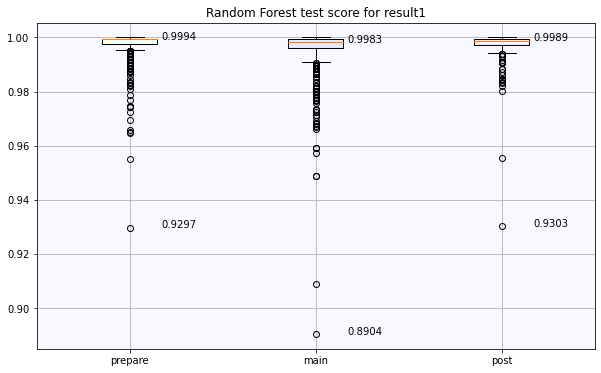

In [63]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([xgb_met[5], xgb_met2[5], xgb_met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.text(1.17,np.median(xgb_met[5]),format(np.median(xgb_met[5]),'.4f'))
plt.text(2.17,np.median(xgb_met2[5]),format(np.median(xgb_met2[5]),'.4f'))
plt.text(3.17,np.median(xgb_met3[5]),format(np.median(xgb_met3[5]),'.4f'))
plt.text(1.17,min(xgb_met[5]),format(min(xgb_met[5]),'.4f'))
plt.text(2.17,min(xgb_met2[5]),format(min(xgb_met2[5]),'.4f'))
plt.text(3.17,min(xgb_met3[5]),format(min(xgb_met3[5]),'.4f'))

plt.title('Random Forest test score for result1')
plt.xticks([1,2,3],['prepare','main','post'])
plt.grid(True)
plt.show()

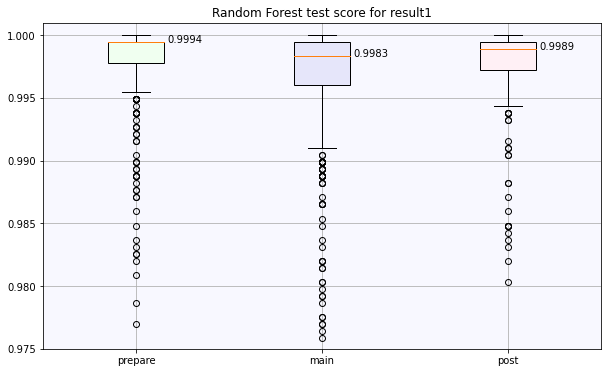

In [64]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([xgb_met[5], xgb_met2[5], xgb_met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.text(1.17,np.median(xgb_met[5]),format(np.median(xgb_met[5]),'.4f'))
plt.text(2.17,np.median(xgb_met2[5]),format(np.median(xgb_met2[5]),'.4f'))
plt.text(3.17,np.median(xgb_met3[5]),format(np.median(xgb_met3[5]),'.4f'))

plt.title('Random Forest test score for result1')
plt.xticks([1,2,3],['prepare','main','post'])
ax.set_ylim(0.975,1.001)
plt.grid(True)
plt.show()

# LGBM

In [65]:
import lightgbm as lgb

## 준비운동

In [66]:
train = result1[['BMI','Weight','age','bending_forward','body_fat','diastolic_bp','grip_power','height','measure_time','sex','sit_up','step_inspection','step_recover_time','systolic_bp']]
label = p
lgbm_list=[]
lgbm_met=[[],[],[],[],[],[]]

for i in range(len(p.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[p.columns[i]], stratify=label[p.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = lgb.LGBMClassifier()
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    lgbm_met[0].append(acc)
    lgbm_met[1].append(precision)
    lgbm_met[2].append(recall)
    lgbm_met[3].append(f1)
    lgbm_met[4].append(mcc)
    lgbm_met[5].append(test_score)

    lgbm_list.append(model)

In [67]:
print('Average acc: ', np.mean(lgbm_met[0]))
print('Average precision: ', np.mean(lgbm_met[1])) 
print('Average recall: ', np.mean(lgbm_met[2]))  
print('Average f1: ', np.mean(lgbm_met[3]))
print('Average mcc: ', np.mean(lgbm_met[4])) 
print('Average test score: ', np.mean(lgbm_met[5]))

Average acc:  0.993084997031293
Average precision:  0.7470319437022356
Average recall:  0.5748171740343931
Average f1:  0.6117995092503093
Average mcc:  0.6331156041705552
Average test score:  0.993084997031293


## 본운동

In [68]:
train = result1[['BMI','Weight','age','bending_forward','body_fat','diastolic_bp','grip_power','height','measure_time','sex','sit_up','step_inspection','step_recover_time','systolic_bp']]
label = m
lgbm_list2=[]
lgbm_met2=[[],[],[],[],[],[]]

for i in range(len(m.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[m.columns[i]], stratify=label[m.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = lgb.LGBMClassifier()
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    lgbm_met2[0].append(acc)
    lgbm_met2[1].append(precision)
    lgbm_met2[2].append(recall)
    lgbm_met2[3].append(f1)
    lgbm_met2[4].append(mcc)
    lgbm_met2[5].append(test_score)

    lgbm_list2.append(model)

In [69]:
print('Average acc: ', np.mean(lgbm_met2[0]))
print('Average precision: ', np.mean(lgbm_met2[1])) 
print('Average recall: ', np.mean(lgbm_met2[2]))  
print('Average f1: ', np.mean(lgbm_met2[3]))
print('Average mcc: ', np.mean(lgbm_met2[4])) 
print('Average test score: ', np.mean(lgbm_met2[5]))

Average acc:  0.9943588248319921
Average precision:  0.853970668856415
Average recall:  0.557909862544852
Average f1:  0.6514109882260926
Average mcc:  0.675283337785705
Average test score:  0.9943588248319921


## 마무리운동

In [70]:
train = result1[['BMI','Weight','age','bending_forward','body_fat','diastolic_bp','grip_power','height','measure_time','sex','sit_up','step_inspection','step_recover_time','systolic_bp']]
label = e
lgbm_list3=[]
lgbm_met3=[[],[],[],[],[],[]]

for i in range(len(e.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[e.columns[i]], stratify=label[e.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = lgb.LGBMClassifier()
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    lgbm_met3[0].append(acc)
    lgbm_met3[1].append(precision)
    lgbm_met3[2].append(recall)
    lgbm_met3[3].append(f1)
    lgbm_met3[4].append(mcc)
    lgbm_met3[5].append(test_score)

    lgbm_list3.append(model)

In [71]:
print('Average acc: ', np.mean(lgbm_met3[0]))
print('Average precision: ', np.mean(lgbm_met3[1])) 
print('Average recall: ', np.mean(lgbm_met3[2]))  
print('Average f1: ', np.mean(lgbm_met3[3]))
print('Average mcc: ', np.mean(lgbm_met3[4])) 
print('Average test score: ', np.mean(lgbm_met3[5]))

Average acc:  0.9925651484062835
Average precision:  0.7804218645176206
Average recall:  0.585378794550935
Average f1:  0.6351009230489263
Average mcc:  0.6556341671344733
Average test score:  0.9925651484062835


## LGBM test score

In [72]:
print(min(lgbm_met[5]), max(lgbm_met[5]), np.mean(lgbm_met[5]), np.median(lgbm_met[5]))
print(min(lgbm_met2[5]), max(lgbm_met2[5]), np.mean(lgbm_met2[5]), np.median(lgbm_met2[5]))
print(min(lgbm_met3[5]), max(lgbm_met3[5]), np.mean(lgbm_met3[5]), np.median(lgbm_met3[5]))

0.8898257448004497 1.0 0.993084997031293 0.9988757729061271
0.851602023608769 1.0 0.9943588248319921 0.9983136593591906
0.8993816750983699 1.0 0.9925651484062835 0.9988757729061271


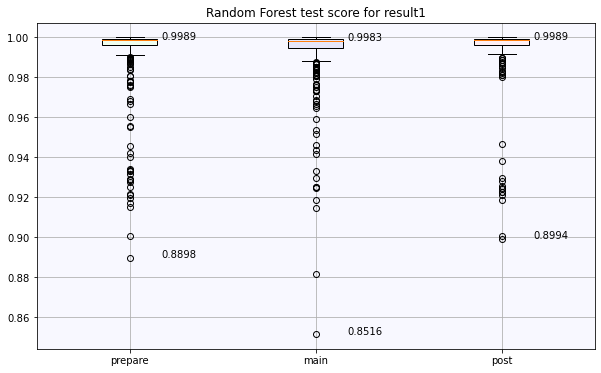

In [73]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([lgbm_met[5], lgbm_met2[5], lgbm_met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.text(1.17,np.median(lgbm_met[5]),format(np.median(lgbm_met[5]),'.4f'))
plt.text(2.17,np.median(lgbm_met2[5]),format(np.median(lgbm_met2[5]),'.4f'))
plt.text(3.17,np.median(lgbm_met3[5]),format(np.median(lgbm_met3[5]),'.4f'))
plt.text(1.17,min(lgbm_met[5]),format(min(lgbm_met[5]),'.4f'))
plt.text(2.17,min(lgbm_met2[5]),format(min(lgbm_met2[5]),'.4f'))
plt.text(3.17,min(lgbm_met3[5]),format(min(lgbm_met3[5]),'.4f'))

plt.title('Random Forest test score for result1')
plt.xticks([1,2,3],['prepare','main','post'])
plt.grid(True)
plt.show()

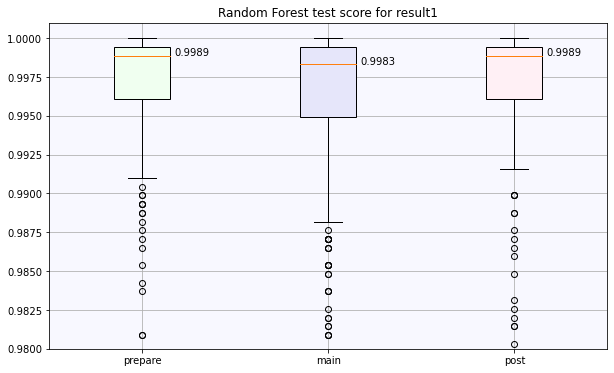

In [74]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([lgbm_met[5], lgbm_met2[5], lgbm_met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.text(1.17,np.median(lgbm_met[5]),format(np.median(lgbm_met[5]),'.4f'))
plt.text(2.17,np.median(lgbm_met2[5]),format(np.median(lgbm_met2[5]),'.4f'))
plt.text(3.17,np.median(lgbm_met3[5]),format(np.median(lgbm_met3[5]),'.4f'))


plt.title('Random Forest test score for result1')
plt.xticks([1,2,3],['prepare','main','post'])
ax.set_ylim(0.98,1.001)
plt.grid(True)
plt.show()